# 统计学习方法 笔记

## ————python 实现及练习 

李航的《统计学习方法》一书， 对统计机器学习作了很好的理论概述。

全书理论十足， 但没有相应的实践代码， 正好可以来练手。


# 第二章 感知器

感知器学习算法 简单而易于实现， 分为原始形式和对偶形式， 是 支持向量机、 神经网络的基础

特征：

1. 二元分类的线性分类器
2. 输入为实例的特征向量
3. 输出为类别， 取+1 或 -1 值

即输入空间中， 将实例划分正负两类的超平面。

### 前期准备

导入相应包

使用 sciki-learn 的数据生成器来生成随机数据

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import sklearn.datasets as dss

* 生成随机数据

方案： 使用 make_blobs ( [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html))

1. 数据量设定为 n=50
2. 只设定两类
3. 两类数据划分明确， 不存在混合， 保证数据线性可分

In [ ]:
# 练手熟悉、 复习
data, data_class = None

In [4]:
data, c = dss.make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

* 绘图

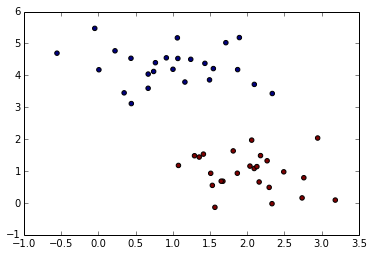

In [206]:
plt.scatter(data[:, 0], data[:, 1], c=c)

## 理论简述

### 模型定义：

输入空间（特征空间）是 $ X \subset R^n $

输入空间到输出空间的如下函数  $$ f(x) = sign(w \cdot x + b) $$ 称为感知器

其中 w 和 b是感知器的模型参数， w 是权值或权值向量， b 是偏置(bias、 residual)

make_blobs 生成的是二维数据， n = 2， 所以 w 是二维向量， 加上第0维的 b， 用 theta 表示为:

$ \theta = (b , w_1 , w_2) $

初始化， 令 theta = [0, 0, 0] , 请注意，  ndarray比较方便

In [1]:
# 请动手

theta = None

In [6]:
theta = np.zeros(3)

请在上一图的基础上， 绘出初始值对应的超平面  $ w\cdot x + b = 0$

In [1]:
# 请
plt.scatter(data[:, 0], data[:, 1], c=c)


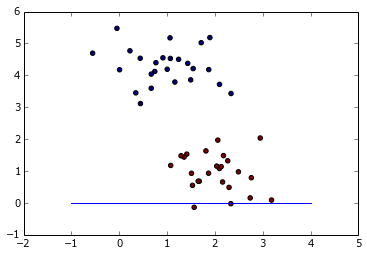

In [9]:
plt.scatter(data[:, 0], data[:, 1], c=c)

x = np.linspace(-1, 4, 50)

plt.plot(x, theta[[1]] * x)

### 2. 学习策略

即定义（经验）损失函数（成本函数）， 并求其极小值（最小值）

#### TODO 待补充


In [203]:
def cost_function(X, y, theta):
    pass



[ 1.06269622  5.17635143] -12.6276292373


### 3. 算法

#### 算法 1 原始形式

1. 选取初值 w, b, 即theta
2. 在训练集中选取数据  $ (x_i, y_i)$
3. 如果 $ y_i(w\cdot{x_i} + b) \leq 0 $ 
$$ w = w + \alpha y_i x_i $$
$$b = b + \alpha y_i $$
4. 转到 第二步， 直到训练集中没有误分类点


在此之前， 先给数据加上第0维的1

In [ ]:
# 请！
data = data

In [11]:
data = np.column_stack( [ np.ones(len(data)) , data])
print data[:3]

[[ 1.          1.41281595  1.5303347 ]
 [ 1.          1.81336135  1.6311307 ]
 [ 1.          1.43289271  4.37679234]]


In [13]:
eta = 2
for i in range(len(data)):
    if (c[i] - 0.5) * (np.dot(data[i], theta)) <= 0:

        theta = theta + eta * (c[i] - 0.5) * data[i]
        print theta
print theta

[ 1.          1.41281595  1.5303347 ]
[ 0.         -0.02007677 -2.84645764]
[ 1.          2.07510109 -1.76731084]
[ 1.          2.07510109 -1.76731084]


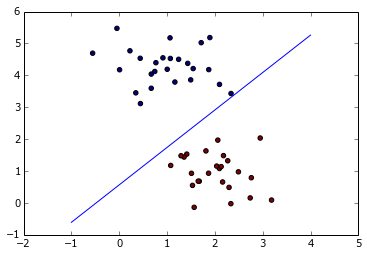

In [15]:
plt.scatter(data[:, 1], data[:, 2], c=c)
plt.plot(x, - (theta[1] * x  + theta[0])/theta[2])

In [16]:
print data
print np.dot(data, theta)

[[ 1.          1.41281595  1.5303347 ]
 [ 1.          1.81336135  1.6311307 ]
 [ 1.          1.43289271  4.37679234]
 [ 1.          1.87271752  4.18069237]
 [ 1.          2.09517785  1.0791468 ]
 [ 1.          2.73890793  0.15676817]
 [ 1.          3.18515794  0.08900822]
 [ 1.          2.06156753  1.96918596]
 [ 1.          2.03835818  1.15466278]
 [ 1.         -0.04749204  5.47425256]
 [ 1.          1.71444449  5.02521524]
 [ 1.          0.22459286  4.77028154]
 [ 1.          1.06923853  4.53068484]
 [ 1.          1.53278923  0.55035386]
 [ 1.          1.4949318   3.85848832]
 [ 1.          1.1641107   3.79132988]
 [ 1.          0.74387399  4.12240568]
 [ 1.          2.29667251  0.48677761]
 [ 1.          0.44359863  3.11530945]
 [ 1.          0.91433877  4.55014643]
 [ 1.          1.67467427  0.68001896]
 [ 1.          2.26908736  1.32160756]
 [ 1.          1.5108885   0.9288309 ]
 [ 1.          1.65179125  0.68193176]
 [ 1.          2.49272186  0.97505341]
 [ 1.          2.33812285